### Homework: Python APIs - WeatherPy

#### Objective: Build a series of scatter plots the shows the relationships between: Temperature (F) vs. Latitude, Humidity (%) vs. Latitude, Cloudiness (%) vs. Latitude and Wind Speed (mph) vs. Latitude. By taking the weather data of random 500+ citis across the world with varying distances from the equator. I will be using the OpenWeatherMap API to gather the data set.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
        

# Loop through the list of cities and perform request for data on each
search_data = []


# Display beginning data retrieval message.
print("Begin Data Retrieval ")
print("---------------------------------------")

# Create counters
RecordCounter = 1
SetCounter = 1

   
# Loop through all the cities in our list
for grouping, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (grouping % 50 == 0 and grouping >= 50):
        SetCounter += 1
        RecordCounter = 1
    #
    WeatherURL = url + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {RecordCounter} of Set {SetCounter} | City: {city}")
    print(f"{WeatherURL}")

    # Add 1 to the record count
    RecordCounter += 1
    
     
    try:
        # Section the JSON and retrieve data
        WeatherCity= requests.get(WeatherURL).json()

        # Pull out the max temp, humidity, wind speed, country, date, latitude, longitude and cloudiness
        city_lat = WeatherCity["coord"]["lat"]
        city_lng = WeatherCity["coord"]["lon"]
        city_max_temp = WeatherCity["main"]["temp_max"]
        city_humidity = WeatherCity["main"]["humidity"]
        city_clouds = WeatherCity["clouds"]["all"]
        city_wind = WeatherCity["wind"]["speed"]
        city_country = WeatherCity["sys"]["country"]
        city_date = WeatherCity["dt"]

        # Append the City information into search_data list
        search_data.append({"City": city, 
                            "Cloudiness": city_clouds,
                            "Country": city_country,
                            "Date": city_date,
                            "Humidity": city_humidity,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Wind Speed": city_wind})
                                 
               
    # If not info found for city, displaying error message
    except:
        print("No weather info found for city.")
    pass
#Display data retrieval complete message when search is complete
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

Begin Data Retrieval 
---------------------------------------
Processing Record 1 of Set 1 | City: saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=saskylakh
Processing Record 2 of Set 1 | City: cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=cape town
Processing Record 3 of Set 1 | City: dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=dikson
Processing Record 4 of Set 1 | City: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=illoqqortoormiut
No weather info found for city.
Processing Record 5 of Set 1 | City: codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=codrington
Processing Record 6 of Set 1 | City: praya
http://api.openweathermap.org/data/2.5/weather?units=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=port alfred
Processing Record 2 of Set 2 | City: belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=belyy yar
Processing Record 3 of Set 2 | City: ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=ola
Processing Record 4 of Set 2 | City: albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=albany
Processing Record 5 of Set 2 | City: rayong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=rayong
Processing Record 6 of Set 2 | City: arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=arraial do cabo
Processing Record 7 of Set 2 | City: geraldton
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 3 of Set 3 | City: hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=hofn
Processing Record 4 of Set 3 | City: katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=katobu
Processing Record 5 of Set 3 | City: port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=port macquarie
Processing Record 6 of Set 3 | City: broken hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=broken hill
Processing Record 7 of Set 3 | City: gora kalwaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=gora kalwaria
Processing Record 8 of Set 3 | City: murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=murgab
Processing Record 9 of Set 3 | City: lat

Processing Record 3 of Set 4 | City: ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=ponta delgada
Processing Record 4 of Set 4 | City: hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=hilo
Processing Record 5 of Set 4 | City: quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=quatre cocos
Processing Record 6 of Set 4 | City: kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=kahului
Processing Record 7 of Set 4 | City: shimanovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=shimanovsk
Processing Record 8 of Set 4 | City: xiongzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=xiongzhou
Processing Record 9 of Set 4 | City: c

Processing Record 4 of Set 5 | City: vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=vaitupu
No weather info found for city.
Processing Record 5 of Set 5 | City: malindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=malindi
Processing Record 6 of Set 5 | City: san ramon de la nueva oran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=san ramon de la nueva oran
Processing Record 7 of Set 5 | City: narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=narsaq
Processing Record 8 of Set 5 | City: kenitra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=kenitra
Processing Record 9 of Set 5 | City: rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=ro

Processing Record 5 of Set 6 | City: boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=boyolangu
Processing Record 6 of Set 6 | City: zdvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=zdvinsk
Processing Record 7 of Set 6 | City: chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=chapais
Processing Record 8 of Set 6 | City: korhogo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=korhogo
Processing Record 9 of Set 6 | City: akranes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=akranes
Processing Record 10 of Set 6 | City: greymouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=greymouth
Processing Record 11 of Set 6 | City: olafsvik
http://a

Processing Record 7 of Set 7 | City: melita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=melita
Processing Record 8 of Set 7 | City: satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=satitoa
No weather info found for city.
Processing Record 9 of Set 7 | City: kalabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=kalabo
Processing Record 10 of Set 7 | City: nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=nemuro
Processing Record 11 of Set 7 | City: berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=berlevag
Processing Record 12 of Set 7 | City: manakara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=manakara
Processing Record 13 of Set 7 |

Processing Record 9 of Set 8 | City: guilin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=guilin
Processing Record 10 of Set 8 | City: sanming
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=sanming
Processing Record 11 of Set 8 | City: luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=luau
Processing Record 12 of Set 8 | City: abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=abu dhabi
Processing Record 13 of Set 8 | City: juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=juneau
Processing Record 14 of Set 8 | City: fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=fort nelson
Processing Record 15 of Set 8 | City: lircay
http://api.o

Processing Record 10 of Set 9 | City: gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=gat
Processing Record 11 of Set 9 | City: mirnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=mirnyy
Processing Record 12 of Set 9 | City: esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=esperance
Processing Record 13 of Set 9 | City: katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=katherine
Processing Record 14 of Set 9 | City: iracoubo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=iracoubo
Processing Record 15 of Set 9 | City: joacaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=joacaba
Processing Record 16 of Set 9 | City: fairbanks
http://api

Processing Record 10 of Set 10 | City: sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=sinnamary
Processing Record 11 of Set 10 | City: sakata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=sakata
Processing Record 12 of Set 10 | City: sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=sambava
Processing Record 13 of Set 10 | City: necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=necochea
Processing Record 14 of Set 10 | City: saquarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=saquarema
Processing Record 15 of Set 10 | City: havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=havelock
Processing Record 16 of Set 10 | City: amb

Processing Record 12 of Set 11 | City: ituni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=ituni
No weather info found for city.
Processing Record 13 of Set 11 | City: taunggyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=taunggyi
Processing Record 14 of Set 11 | City: bonfim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=bonfim
Processing Record 15 of Set 11 | City: los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=los llanos de aridane
Processing Record 16 of Set 11 | City: aparecida do taboado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=aparecida do taboado
Processing Record 17 of Set 11 | City: rubtsovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2

Processing Record 13 of Set 12 | City: ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=ust-tsilma
Processing Record 14 of Set 12 | City: upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=upington
Processing Record 15 of Set 12 | City: fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=fayaoue
Processing Record 16 of Set 12 | City: umm kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=umm kaddadah
Processing Record 17 of Set 12 | City: longlac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=longlac
No weather info found for city.
Processing Record 18 of Set 12 | City: jaumave
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=jaumave
Pr

Processing Record 14 of Set 13 | City: nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=nuuk
Processing Record 15 of Set 13 | City: talaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0f305f387c2200b4b1204a62c9e95b0e&q=talaya
---------------------------------------
Data Retrieval Complete
---------------------------------------


In [4]:
# Convert to dataframe

CitiesWeatherInfo_df = pd.DataFrame(search_data)

CitiesWeatherInfo_df = CitiesWeatherInfo_df[["City", 
                            "Cloudiness",
                            "Country",
                            "Date",
                            "Humidity",
                            "Lat",
                            "Lng",
                            "Max Temp",
                            "Wind Speed"]]
CitiesWeatherInfo_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [5]:

# Display dataframe
CitiesWeatherInfo_df.to_csv(output_data_file, index_label="Cities Weather")

CitiesWeatherInfo_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,20,RU,1532300049,87,71.97,114.09,42.06,9.42
1,cape town,0,ZA,1532296800,62,-33.93,18.42,59.00,9.17
2,dikson,36,RU,1532299845,100,73.51,80.55,38.55,13.67
3,codrington,0,AU,1532299955,79,-28.95,153.24,56.28,3.60
4,praya,40,ID,1532298600,94,-8.71,116.27,75.20,6.93


## Latitude vs Temperature Plot

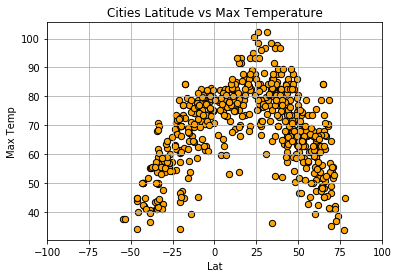

In [6]:
# Create and display Latitude vs Temperature scatter plot
CitiesWeatherInfo_df.plot.scatter("Lat", 
                       "Max Temp",
                       title="Cities Latitude vs Max Temperature",
                       s=40,
                       xlim=[-100,100],           
                       color="Orange",
                       edgecolor="Black",
                       grid=True)
# Save figure
plt.savefig("output_data/Latitude_vs_MaxTemp.png")

## Latitude vs Humidity Plot

In [ ]:
# Create and display latitude vs humidity scatter plot
CitiesWeatherInfo_df.plot.scatter("Lat", 
                       "Humidity",
                       title="Cities Latitude vs Humidity",
                       s=40,
                       xlim=[-100,100],
                       color="Orange",
                       edgecolor="Black",
                       grid=True)
# Save figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

## Latitude vs Cloudiness

In [ ]:
# Create and display latitude vs cloudiness scatter plot
CitiesWeatherInfo_df.plot.scatter("Lat", 
                       "Cloudiness",
                       title="Cities Latitude vs Cloudiness",
                       s=40,
                       xlim=[-100,100],
                       color="Orange",
                       edgecolor="Black",
                       grid=True)
# Save figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

## Latitude vs Wind Speed

In [ ]:
# Create and display latitude vs wind speed scatter plot
CitiesWeatherInfo_df.plot.scatter("Lat", 
                       "Wind Speed",
                       title="Cities Latitude vs Wind Speed",
                       s=40,
                       xlim=[-100,100],
                       color="Orange",
                       edgecolor="Black",
                       grid=True)
# Save figure
plt.savefig("output_data/Latitude_vs_WindSpeed.png")

### Observable Trends

#### The following are four obserbvable trends per latitude relationships: temperature, humidity, cloudiness, wind speed .

#### 1. Between the latitudes of 25 to 50 the max temperature ranges from 80 F to 110 F.

#### 2. Between the latitudes of -50 to 75 the humidity ranges from 60 to 100 percent. 

#### 3. Between the latitudes of -50 to 75 the cloudiness clusters at 0, 20, 78 and 85 percent coverage.

#### 4. Between the latitudes of -50 to 75 the wind speeds range from 2 to 15 mph.